# Principal components analysis
Following https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 and https://medium.com/towards-artificial-intelligence/principal-component-analysis-pca-with-python-examples-tutorial-67a917bae9aa

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
cov_data = np.corrcoef(iris.data.T)
cov_data

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

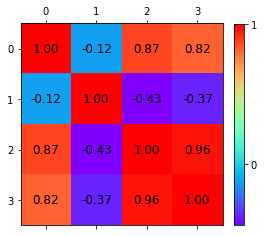

In [4]:
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

In [5]:
x = df.drop(labels='class', axis=1).values #iris.data
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
y = df['class'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
x = StandardScaler().fit_transform(x)

In [8]:
pca = PCA(n_components=2)
# pca = PCA(n_components=.95)# explain 95% of variance

In [9]:
pcs = pca.fit_transform(x)
pcs

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [10]:
print(x.shape)
print(pcs.shape)

(150, 4)
(150, 2)


In [11]:
pcdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
df2 = pd.concat([pcdf, df['class']], axis=1)
df2

,pc1,pc2,class
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


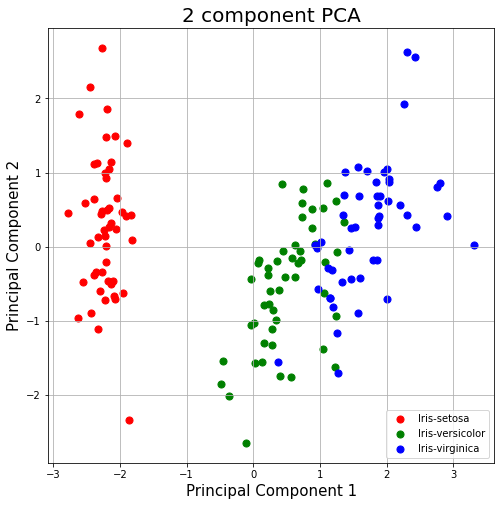

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
labels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = df2['class'] == target
    ax.scatter(df2.loc[indicesToKeep, 'pc1'], df2.loc[indicesToKeep, 'pc2'],
               c = color, s = 50, label=labels[target])
ax.legend()
ax.grid()

## Useful attributes

In [13]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [14]:
pca.n_components_

2

In [15]:
pca.n_features_

4

In [16]:
pca.singular_values_

array([20.92306556, 11.7091661 ])

## Transforming and inverting the transformation
- transforming is projecting into a lower-dimensional space (inner product with subset of basis vectors)
- inverse transform is calculating the new expansion in the original coordinate system

In [17]:
x[:1]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ]])

In [18]:
xt = pca.transform(x[:1])
xt

array([[-2.26470281,  0.4800266 ]])

In [19]:
pca.inverse_transform(xt) #NB don't get same answer if transform projects into a lower dimensional space

array([[-0.99888895,  1.05319838, -1.30270654, -1.24709825]])

### Getting the first principal component

In [20]:
pca.inverse_transform(np.array([[1,0]]))

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]])

### Getting the second principal component

In [21]:
pca.inverse_transform(np.array([[0,1]]))

array([[0.37741762, 0.92329566, 0.02449161, 0.06694199]])